In this project, we deal with real information about the houses in the city of Beijing, and we perform comprehensive and useful analyses on this dataset, and we show the results of the analyses by drawing diagrams.

The project consists of 5 main parts:

1_In the first part, the data will be read and the columns that are not needed will be deleted. There is also a thought about the missing values.

2_In the second part, the columns are converted to the appropriate format and the outliers are removed.

3_In the third part, using the existing features, new features will be created that will be very useful in the next two steps.

4_In the fourth part, using the latitude and longitude of the houses, we show them on the map to get a general view of that area.

5_In the last step, using the time of the trades, we will analyze the time of the trades made.

In [30]:
#First of all we load the data from the csv file
#Since the dataset has chinese characters, we need to specify the encoding
#We also need to specify low_memory=False to avoid a warning
import pandas as pd
housing = pd.read_csv('housing_data.csv', encoding='gbk',low_memory=False)
housing.shape

(318851, 22)

As you can see, the information of more than 300,000 houses is stored in this file. This time we are dealing with a rather heavy dataset.
Let's look at the first 10 columns of the data to get a better understanding of the information stored in this dataset

In [31]:
housing.head(10)

,Unnamed: 0,url,id,Lng,Lat,Cid,tradeTime,DOM,totalPrice,square,...,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district
0,0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,415.0,131.00,...,1,1,高 26,2005,3,6,0.217,1.0,1.0,7
1,1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,575.0,132.38,...,1,2,高 22,2004,4,6,0.667,1.0,0.0,7
2,2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,1030.0,198.00,...,1,3,中 4,2005,3,6,0.500,1.0,0.0,7
3,3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,297.5,134.00,...,1,1,底 21,2008,1,6,0.273,1.0,0.0,6
4,4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,392.0,81.00,...,1,1,中 6,1960,2,2,0.333,0.0,1.0,1
5,5,https://bj.lianjia.com/chengjiao/101087277815....,101087277815,116.466280,39.991363,1111027377512,2016-07-22,861.0,275.6,53.00,...,1,1,中 8,2005,3,6,0.333,1.0,0.0,7
6,6,https://bj.lianjia.com/chengjiao/101087292623....,101087292623,116.482586,39.891991,1111027380683,2016-07-14,851.0,275.0,73.00,...,1,1,高 6,1997,4,2,0.500,0.0,0.0,7
7,7,https://bj.lianjia.com/chengjiao/101087303800....,101087303800,116.453917,39.881534,1111027381879,2016-09-07,904.0,800.0,161.55,...,1,2,高 22,2004,4,6,0.667,1.0,0.0,7
8,8,https://bj.lianjia.com/chengjiao/101087463212....,101087463212,116.555729,40.162058,1111027379605,2016-09-04,873.0,134.0,48.00,...,1,1,高 10,2009,1,2,0.333,0.0,0.0,13
9,9,https://bj.lianjia.com/chengjiao/101087508625....,101087508625,116.453086,39.898397,1111027374519,2016-09-05,865.0,380.0,68.00,...,0,0,中 23,2009,4,6,0.308,1.0,1.0,1


<center>
<table style="direction: ltr;align: center; text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
  <tr>
      <td><code>Unnamed: 0</code></td><td>It's a data profile that we don't need and should be deleted.</td>
</tr>

  <tr>
      <td><code>url</code></td><td>Transaction Link</td>
</tr>
 

<tr>
      <td><code>id</code></td><td>Transaction ID</td>
</tr>
 
<tr>
      <td><code>Lng</code></td><td>Longitude of the house traded
      </td>
</tr>
 
  
<tr>
      <td><code>Lat</code></td><td>Latitude of the house traded</td>
</tr>
 
  
<tr>
      <td><code>Cid</code></td><td>Buyer ID</td>
</tr>
 
       
 
<tr>
      <td><code>tradeTime</code></td><td>Trading Time</td>
</tr>    

 
<tr>
      <td><code>DOM</code></td><td>The number of days that have passed since the time of placing the advertisement for the house.</td>
</tr>    

<tr>
      <td><code>totalPrice</code></td><td>The price at which the house was sold.</td>
</tr>    
  
<tr>
      <td><code>square</code></td><td>House Area</td>
</tr>       

<tr>
      <td><code>livingRoom</code></td><td>Number of Living Rooms</td>
</tr>       


    
<tr>
      <td><code>drawingRoom</code></td><td>Number of Drawing Rooms</td>
</tr>       

    
    
<tr>
      <td><code>kitchen</code></td><td>Number of kitchens</td>
</tr>       

        
<tr>
      <td><code>bathRoom</code></td><td>Number of bath rooms</td>
</tr>       


<tr>
      <td><code>floor</code></td><td>Floor and height of the house</td>
</tr>       

    
<tr>
      <td><code>constructionTime</code></td><td>The year the house was built</td>
</tr>       
  
  
    
<tr>
      <td><code>renovationCondition</code></td><td>Home Renovation Status</td>
</tr>       
  
    
<tr>
      <td><code>buildingStructure</code></td><td>House Structure</td>
</tr>       
  

<tr>
      <td><code>ladderRatio</code></td><td>Floor and height of the house</td>
</tr>             
  
<tr>
      <td><code>elevator</code></td><td>Does the house have an elevator or not?</td>
</tr>       
  
  
<tr>
      <td><code>subway</code></td><td>Does the house have access to the subway or not</td>
</tr>    
    
  
<tr>
      <td><code>district</code></td><td>The area where the house is located</td>
</tr>    
    

</table>

</center>

Remove the <code>url</code>, <code>id</code>, <code>cid</code>, and first column columns that were the data index, and insert the new dataframe in the variable

In [32]:
housing_dropped=housing.drop(['Cid', 'id','url','Unnamed: 0'], axis=1)

Create a dataframe called <code>housing_null</code> that has column names in its indexes and in a column called <code>0</code>, the number of missing values in that column.

In [33]:
housing_null = pd.DataFrame(housing_dropped.isna().sum())
housing_null

,0
Lng,0
Lat,0
tradeTime,0
DOM,157977
totalPrice,0
square,0
livingRoom,0
drawingRoom,0
kitchen,0
bathRoom,0


The <code>DOM</code> column, which shows the number of days an ad was placed on the site, has a lot of missing values, and if we were to remove rows that don't have a <code>DOM</code> value, almost half of our data would be deleted! On the other hand, this feature has important consequences for homes, and removing the <code>DOM</code> column is not a sensible thing to do.
So we should think about filling in the blank values of this column.

The average or column mode can be used to fill in the blank values. Let's take a look at the box chart to make a better decision.

<Axes: >

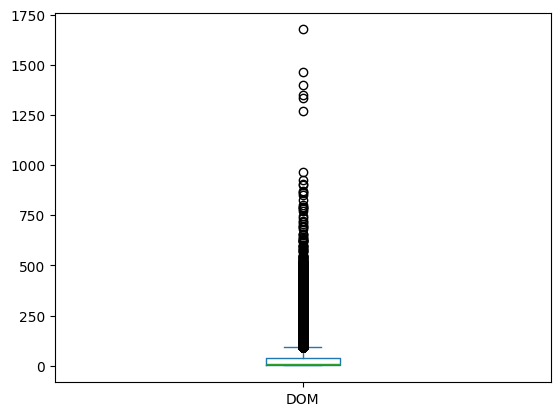

In [34]:
housing_dropped.DOM.plot(kind='box')

Unfortunately, there is a lot of outlier information in this column. In this situation, using fashion would be a better option.

In [35]:
#First we create a copy of the data and then do the work.
housing_no_missing = housing_dropped.copy()
housing_no_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318851 entries, 0 to 318850
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Lng                  318851 non-null  float64
 1   Lat                  318851 non-null  float64
 2   tradeTime            318851 non-null  object 
 3   DOM                  160874 non-null  float64
 4   totalPrice           318851 non-null  float64
 5   square               318851 non-null  float64
 6   livingRoom           318851 non-null  object 
 7   drawingRoom          318851 non-null  object 
 8   kitchen              318851 non-null  int64  
 9   bathRoom             318851 non-null  object 
 10  floor                318851 non-null  object 
 11  constructionTime     318851 non-null  object 
 12  renovationCondition  318851 non-null  int64  
 13  buildingStructure    318851 non-null  int64  
 14  ladderRatio          318851 non-null  float64
 15  elevator         

In the <code>dataframe housing_no_missing</code> we replace the empty values of the <code>DOM</code> column with the mod value of this column. After that, we remove the rows where the <code>elevator</code> or <code>subway</code> value is empty.

In [36]:
DOM_mode=housing_no_missing['DOM'].mode()[0]
housing_no_missing['DOM'] = housing_no_missing['DOM'].fillna(DOM_mode)
housing_no_missing.dropna(subset=['subway', 'elevator'], inplace=True)

If you look at the <code>info()</code> you will notice that <code>livingRoom</code> and <code>drawingRoom</code> and <code>bathRoom</code> are naturally numbers but stored as objects so let's change this.

In [37]:
housing_no_missing[['livingRoom', 'drawingRoom', 'bathRoom']] = housing_no_missing[['livingRoom', 'drawingRoom', 'bathRoom']].astype(int)

#If the work is done approperately housing_no_missing df most have 318819 rows.
housing_no_missing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 318819 entries, 0 to 318850
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Lng                  318819 non-null  float64
 1   Lat                  318819 non-null  float64
 2   tradeTime            318819 non-null  object 
 3   DOM                  318819 non-null  float64
 4   totalPrice           318819 non-null  float64
 5   square               318819 non-null  float64
 6   livingRoom           318819 non-null  int64  
 7   drawingRoom          318819 non-null  int64  
 8   kitchen              318819 non-null  int64  
 9   bathRoom             318819 non-null  int64  
 10  floor                318819 non-null  object 
 11  constructionTime     318819 non-null  object 
 12  renovationCondition  318819 non-null  int64  
 13  buildingStructure    318819 non-null  int64  
 14  ladderRatio          318819 non-null  float64
 15  elevator             3

In this section, we convert the numerical and non-numerical data of the dataset to an appropriate format so that we do not face any challenges in performing the analysis. We will also remove outlier data that includes very expensive or very cheap homes that are rarely seen.

let's change the values of <code>the elevator</code>, <code>buildingStructure</code>, <code>renovationCondition</code>, and <code>subway</code> columns according to the following values and store in a new dataframe called <code>housing_categorical</code>.

In [38]:
housing_categorical = housing_no_missing.copy()

housing_categorical = housing_categorical.replace({
    'elevator': {1: 'has elevator', 0: 'no elevator'},
    'subway': {1: 'has subway', 0: 'no subway'},
    'buildingStructure': {1: 'unknown', 2: 'mixed', 3: 'brick and wood', 4: 'concrete', 5: 'steel', 6: 'steel-concrete composite'},
    'renovationCondition': {1: 'other', 2: 'rough', 3: 'Simplicity', 4: 'hardcover'}
})

housing_categorical.head()

,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district
0,116.475489,40.019520,2016-08-09,1464.0,415.0,131.00,2,1,1,1,高 26,2005,Simplicity,steel-concrete composite,0.217,has elevator,has subway,7
1,116.453917,39.881534,2016-07-28,903.0,575.0,132.38,2,2,1,2,高 22,2004,hardcover,steel-concrete composite,0.667,has elevator,no subway,7
2,116.561978,39.877145,2016-12-11,1271.0,1030.0,198.00,3,2,1,3,中 4,2005,Simplicity,steel-concrete composite,0.500,has elevator,no subway,7
3,116.438010,40.076114,2016-09-30,965.0,297.5,134.00,3,1,1,1,底 21,2008,other,steel-concrete composite,0.273,has elevator,no subway,6
4,116.428392,39.886229,2016-08-28,927.0,392.0,81.00,2,1,1,1,中 6,1960,rough,mixed,0.333,no elevator,has subway,1


Columns that have a string value are of <code>the Object</code> type. If you look closely, you'll see that some of the numeric columns (such as the year the house was built and the height of the house) are also stored as <code>objects</code>. In the next step, we convert these columns to a numerical value.

In [39]:
print('constructionTime : ',housing_categorical.constructionTime.unique())
print('floor : ',housing_categorical.floor.unique())

constructionTime :  ['2005' '2004' '2008' '1960' '1997' '2009' '2006' '1991' '2001' '1990'
 '2011' '2000' '1998' '2010' '1996' '1993' '2002' '未知' '2012' '1989'
 '2003' '2007' '1994' '1984' '1992' '2014' '1985' '2013' '1999' '1979'
 '1981' '1976' '1982' '1975' '1983' '1986' '1995' '1965' '1988' '1987'
 '2015' '1955' '1980' '1978' '1958' '1970' '1956' '1977' '1964' '1963'
 '1967' '2016' '1974' '1973' '1959' '1954' '1962' '1966' '1957' '1944'
 '1972' '1971' '1953' '1968' '1961' '1950' '1952' '1933' '1969' '1906'
 '1934' '1914']
floor :  ['高 26' '高 22' '中 4' '底 21' '中 6' '中 8' '高 6' '高 10' '中 23' '底 11' '底 3'
 '高 24' '低 23' '中 19' '高 18' '低 25' '中 12' '中 14' '中 30' '中 27' '中 5'
 '低 18' '底 28' '中 11' '低 9' '顶 7' '顶 27' '低 6' '中 17' '顶 6' '中 24' '中 15'
 '底 5' '中 29' '顶 19' '顶 5' '中 9' '低 22' '顶 18' '低 16' '高 13' '高 9' '高 17'
 '底 6' '中 28' '低 26' '底 15' '高 16' '底 2' '低 7' '中 13' '低 33' '底 14' '高 15'
 '底 4' '顶 11' '中 32' '顶 16' '底 18' '顶 17' '低 14' '低 10' '底 20' '高 12'
 '低 31' '低 30' '低 19' '低

Take a look at the unique values of the <code>constructionTime</code> column. For some homes, there is a Chinese phrase that means unknown. The number of such homes is small, so we can exclude homes whose construction date is unclear although it may be better to include the average year of construction or the fashion year of construction instead of eliminating these houses.
<br>
In this section, remove the houses whose date of construction is not known, and then change the type of <code>the constructionTime</code> column to <code>int.</code> Equal the name of the new data frame to <code>housing_construction</code>.

In [40]:
housing_categorical = housing_categorical[housing_categorical['constructionTime'] != '未知']
housing_categorical['constructionTime'] = housing_categorical['constructionTime'].astype(int)

housing_categorical.head()

,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district
0,116.475489,40.019520,2016-08-09,1464.0,415.0,131.00,2,1,1,1,高 26,2005,Simplicity,steel-concrete composite,0.217,has elevator,has subway,7
1,116.453917,39.881534,2016-07-28,903.0,575.0,132.38,2,2,1,2,高 22,2004,hardcover,steel-concrete composite,0.667,has elevator,no subway,7
2,116.561978,39.877145,2016-12-11,1271.0,1030.0,198.00,3,2,1,3,中 4,2005,Simplicity,steel-concrete composite,0.500,has elevator,no subway,7
3,116.438010,40.076114,2016-09-30,965.0,297.5,134.00,3,1,1,1,底 21,2008,other,steel-concrete composite,0.273,has elevator,no subway,6
4,116.428392,39.886229,2016-08-28,927.0,392.0,81.00,2,1,1,1,中 6,1960,rough,mixed,0.333,no elevator,has subway,1


Now let's move on to the <code>floor</code> column, which has a slightly different story. In the houses of this column, there is first a Chinese word and then a number. The number after the Chinese character indicates the height of the house. After getting help from Google Translate, we found out that those words are equivalent to high, low, and medium. This column can be converted into two different columns, but here we are throwing away the Chinese phrases and keeping only the numbers.

In [41]:
housing_categorical['floor'] = housing_categorical['floor'].str.extract('(\d+)').astype(int)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\fardi\AppData\Local\Temp\ipykernel_17396\2899274804.py:1: SyntaxWarning: invalid escape sequence '\d'
  housing_categorical['floor'] = housing_categorical['floor'].str.extract('(\d+)').astype(int)


In [42]:
housing_categorical.head()

,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district
0,116.475489,40.019520,2016-08-09,1464.0,415.0,131.00,2,1,1,1,26,2005,Simplicity,steel-concrete composite,0.217,has elevator,has subway,7
1,116.453917,39.881534,2016-07-28,903.0,575.0,132.38,2,2,1,2,22,2004,hardcover,steel-concrete composite,0.667,has elevator,no subway,7
2,116.561978,39.877145,2016-12-11,1271.0,1030.0,198.00,3,2,1,3,4,2005,Simplicity,steel-concrete composite,0.500,has elevator,no subway,7
3,116.438010,40.076114,2016-09-30,965.0,297.5,134.00,3,1,1,1,21,2008,other,steel-concrete composite,0.273,has elevator,no subway,6
4,116.428392,39.886229,2016-08-28,927.0,392.0,81.00,2,1,1,1,6,1960,rough,mixed,0.333,no elevator,has subway,1


In [43]:
#So know let's take a look at the data types of the columns
housing_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299536 entries, 0 to 318849
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Lng                  299536 non-null  float64
 1   Lat                  299536 non-null  float64
 2   tradeTime            299536 non-null  object 
 3   DOM                  299536 non-null  float64
 4   totalPrice           299536 non-null  float64
 5   square               299536 non-null  float64
 6   livingRoom           299536 non-null  int64  
 7   drawingRoom          299536 non-null  int64  
 8   kitchen              299536 non-null  int64  
 9   bathRoom             299536 non-null  int64  
 10  floor                299536 non-null  int64  
 11  constructionTime     299536 non-null  int64  
 12  renovationCondition  299536 non-null  object 
 13  buildingStructure    299536 non-null  object 
 14  ladderRatio          299536 non-null  float64
 15  elevator             2

They may be houses that are too large or too expensive, or conversely, houses that are too cheap or too small and far from average. In some data analysis matters, outlier data can alter the results in an undesirable way. For example, graphs become incomprehensible, or in machine learning tasks, this data may mislead the algorithm. In this section, we will remove some of the houses that have one or more outlier or unusual features.

<Axes: >

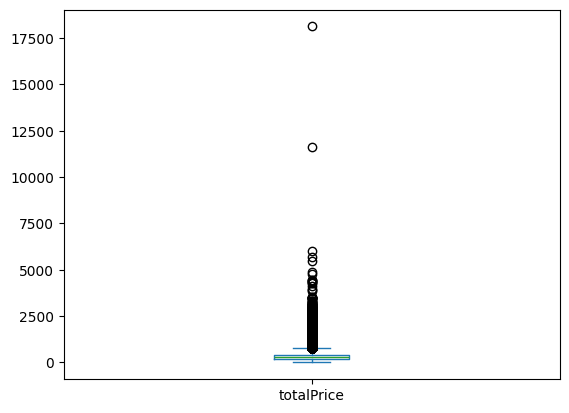

In [44]:
housing_categorical.totalPrice.plot(kind = 'box')

Some of the data is so outlied that the box chart is out of the box! The dots at the top of the chart are very outlier data.

We eliminate houses whose total price is not within 1.5 times the interquartile and put the product (the remaining data) in <code>the housing_no_outlier</code> dataframe. If we have done the steps correctly, 14,496 houses should be removed.

In [45]:
q1=housing_categorical['totalPrice'].quantile(0.25)
q3=housing_categorical['totalPrice'].quantile(0.75)
housing_no_outlier = housing_categorical.drop(housing_categorical[(housing_categorical['totalPrice'] < q1 - 1.5*(q3-q1)) | (housing_categorical['totalPrice'] > q3 + 1.5*(q3-q1))].index)

print('Number of removed outliers : ', housing_categorical.shape[0] - housing_no_outlier.shape[0])

Number of removed outliers :  14496


Know let's take a look at the box chart again

<Axes: >

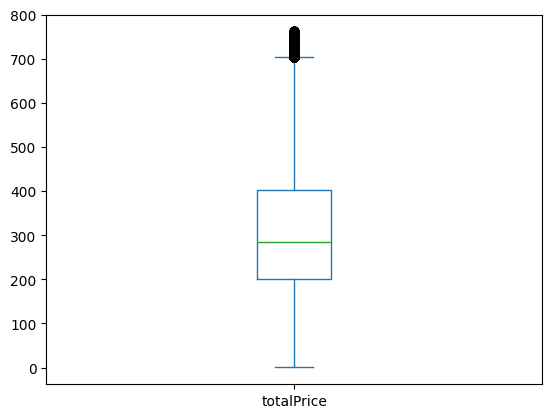

In [46]:
housing_no_outlier.totalPrice.plot(kind = 'box')

The Beijing City Homes Dataset provides us with very useful information, but sometimes it is possible to generate new features using existing features. For example, by having the total area and price of each house, we can calculate the price per square meter for each house, which is an important feature in the analysis of housing information. In this part of the project, we'll add two new features to our dataset, and then we'll start drawing graphs to explore the relationships between them with visualization tools.

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Let's Calculate the capital of China and save it in a column called <code>distanceToCapital</code>.
The longitude and latitude of the center of the<code></code> Chinese capital are <code>116.4074</code> and <code>39.9042</code>, respectively.<code></code>
To calculate the distance, we can use the formula below.

$$ distance = acos(sinφ_1*sinφ_2 + cosφ_1*cosφ_2 * cos(λ_2-λ_1)) * 6371.0088 $$
$$ φ: \text{latitude} $$ 
$$ λ: \text{longitude} $$ 

In [48]:
#Befor we write the calculation we need to convert the Lat and Lng to radians
from math import radians
capital_Lng = radians(116.4074)
capital_Lat = radians(39.9042)

#We do the calculation on a copy of the data.
housing_capital = housing_no_outlier.copy()
housing_capital['distanceToCapital'] = housing_capital['Lat'].apply(lambda x: np.sin(radians(x))) * np.sin(capital_Lat) + housing_capital['Lat'].apply(lambda x: np.cos(radians(x))) * np.cos(capital_Lat) * housing_capital['Lng'].apply(lambda x: np.cos(radians(x)- capital_Lng))
housing_capital['distanceToCapital'] = housing_capital['distanceToCapital'].apply(lambda x: np.acos(x) * 6371.0088)
housing_capital.head()

,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district,distanceToCapital
0,116.475489,40.019520,2016-08-09,1464.0,415.0,131.00,2,1,1,1,26,2005,Simplicity,steel-concrete composite,0.217,has elevator,has subway,7,14.074996
1,116.453917,39.881534,2016-07-28,903.0,575.0,132.38,2,2,1,2,22,2004,hardcover,steel-concrete composite,0.667,has elevator,no subway,7,4.701224
3,116.438010,40.076114,2016-09-30,965.0,297.5,134.00,3,1,1,1,21,2008,other,steel-concrete composite,0.273,has elevator,no subway,6,19.293041
4,116.428392,39.886229,2016-08-28,927.0,392.0,81.00,2,1,1,1,6,1960,rough,mixed,0.333,no elevator,has subway,1,2.683335
5,116.466280,39.991363,2016-07-22,861.0,275.6,53.00,1,0,1,1,8,2005,Simplicity,steel-concrete composite,0.333,has elevator,no subway,7,10.914652


In this data set, the price of the transaction and the size of each house are determined. But the price per square meter of the house is not known. Let's calculate and save the price per square meter of the house in the <code>pricePerSquare</code> column. the overall price is based on <i>million yuan</i>. So the price you calculate for each square meter of the house must be multiplied by a 1000 to get the price in <i>yuan</i>.

In [49]:
housing_capital['pricePerSquare'] = (housing_capital['totalPrice']/housing_capital['square'])*1000

housing_capital.head()

,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district,distanceToCapital,pricePerSquare
0,116.475489,40.019520,2016-08-09,1464.0,415.0,131.00,2,1,1,1,26,2005,Simplicity,steel-concrete composite,0.217,has elevator,has subway,7,14.074996,3167.938931
1,116.453917,39.881534,2016-07-28,903.0,575.0,132.38,2,2,1,2,22,2004,hardcover,steel-concrete composite,0.667,has elevator,no subway,7,4.701224,4343.556428
3,116.438010,40.076114,2016-09-30,965.0,297.5,134.00,3,1,1,1,21,2008,other,steel-concrete composite,0.273,has elevator,no subway,6,19.293041,2220.149254
4,116.428392,39.886229,2016-08-28,927.0,392.0,81.00,2,1,1,1,6,1960,rough,mixed,0.333,no elevator,has subway,1,2.683335,4839.506173
5,116.466280,39.991363,2016-07-22,861.0,275.6,53.00,1,0,1,1,8,2005,Simplicity,steel-concrete composite,0.333,has elevator,no subway,7,10.914652,5200.000000


We want to extract information tailored to our needs by visualizing data in different ways. Our dataset has no missing value, no outlier data, and no columns that are stored in the wrong format. In the first step, we will take a look at the histogram of the numerical columns.

C:\Users\fardi\AppData\Local\Temp\ipykernel_17396\1080327918.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  housing_capital.hist(ax = ax, bins = 20);


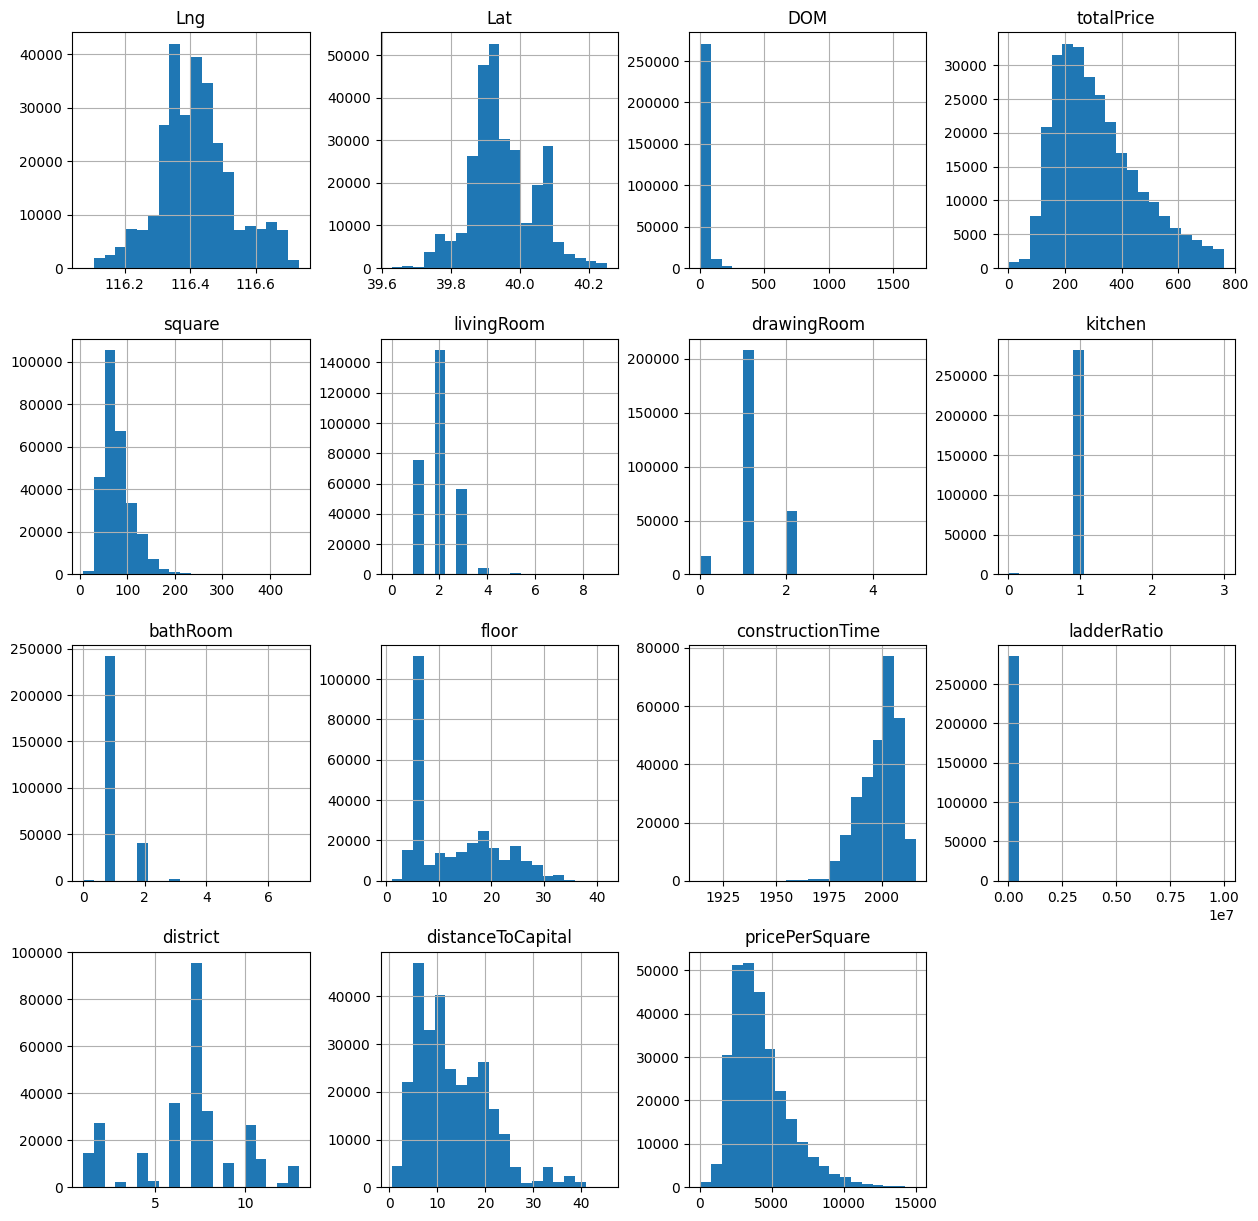

In [50]:
fig , ax = plt.subplots()
fig.set_size_inches(15,15)
housing_capital.hist(ax = ax, bins = 20);

According to the chart above, house prices have a curve towards the price of 200 million yuan. Most of the houses were built around the year 2000. The greatest distance from the center of the capital is 40 kilometers. Most homes have two hall rooms. More information can be extracted from this chart.

Moving away from the city center, how does the price per square meter of the house change?

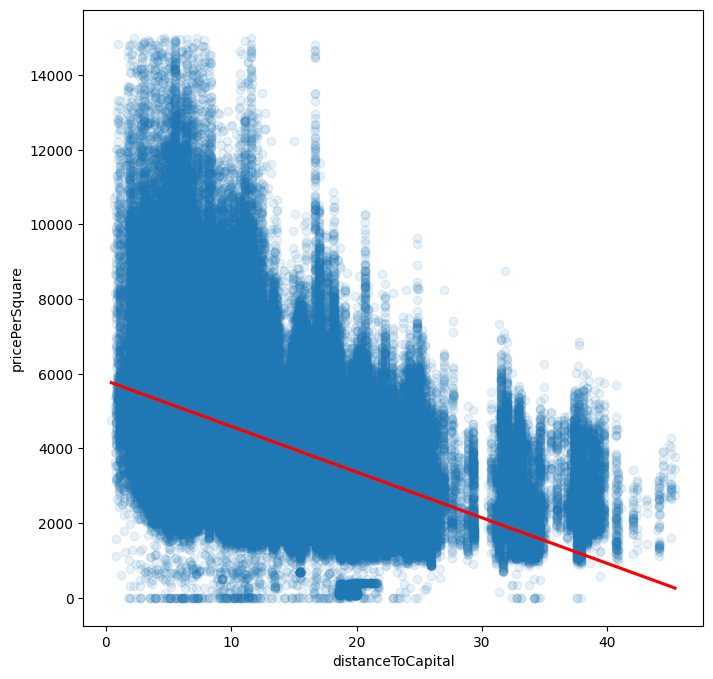

In [51]:
fig2 , ax2 = plt.subplots()
fig2.set_size_inches(8,8)

sns.regplot(ax = ax2, data = housing_capital, x = 'distanceToCapital', y = 'pricePerSquare', 
                   line_kws={'color':'red'}, scatter_kws= {'alpha': 0.1});

As you can see moving away form the city centy has negetive effects on the price per square

In this section, we want to examine how effective it is to have an elevator.
<b>
Price per square meter
</b>
Houses are affected.

C:\Users\fardi\AppData\Local\Temp\ipykernel_17396\3423102454.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend()


Text(0.5, 0, 'pricePerSquare')

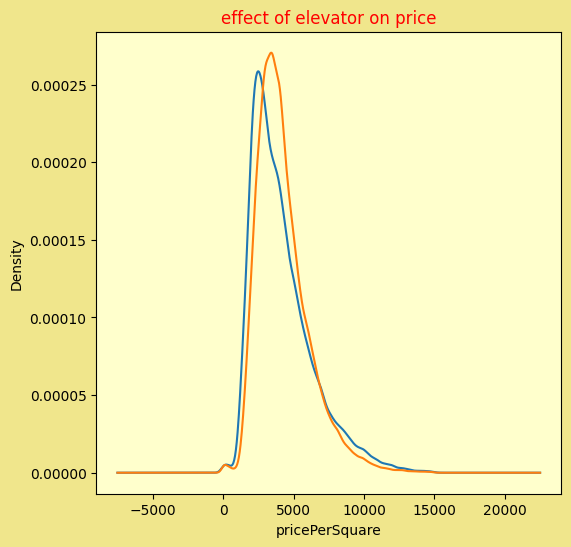

In [52]:
fig3, ax3 = plt.subplots(figsize=(6,6))
housing_capital[housing_capital['elevator']=='no elevator'].pricePerSquare.plot(kind='kde',label='no elevator')
housing_capital[housing_capital['elevator']=='has elevator'].pricePerSquare.plot(kind='kde',label='has elevator')
fig3.set_facecolor('khaki')
ax3.set_facecolor('#ffffcc')
ax3.set_title('effect of elevator on price',color='red')
ax2.legend()
ax3.set_xlabel('pricePerSquare')

In the China Homes Dataset, the geographic coordinates of each house are known. Using the Matplot Library's <code>scatter</code> function, you can draw houses based on their location and then analyze the map. Very useful information can be extracted from these maps. The density of different areas, the characteristics of the houses in each area (having an elevator, area, price, etc.) are some of the information that can be obtained from this chart.

In [53]:
#To prevent the notebook from crashing we will take a sample of the data and it will be one row per every 100 rows.
housing_sample = housing_capital.iloc[:-100:100]
housing_sample.shape

(2850, 20)

By having the latitude and longitude of the houses, we can draw the houses on the screen with the help of a scatter chart and see their position relative to each other.

Text(0.5, 1.0, 'scatter plot')

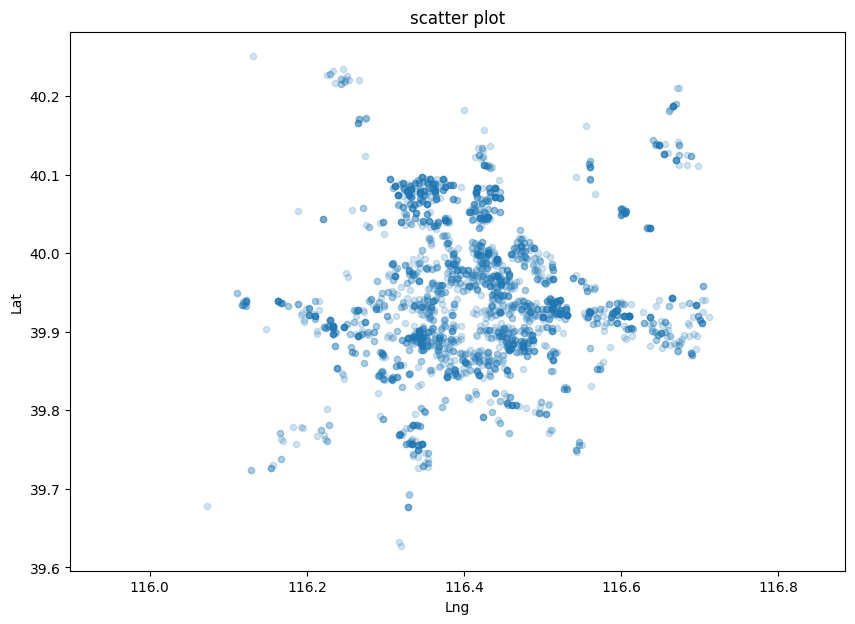

In [54]:
fig4 , ax4 = plt.subplots()
fig4.set_size_inches(10,7)

housing_sample.plot(x='Lng', y='Lat', ax=ax4, kind='scatter', alpha=0.2)
ax4.axis('equal')
ax4.set_title('scatter plot')

You can see that most of the houses are clustered in one place, which is the center of the Chinese capital.

We plan to use the <b>price per square meter</b> to determine the color of the dots. That is, the price of each house is converted to a color for that point on the map by the color mapping function. Due to the use of <code>jet</code> color mapping, the higher the price, the more the color will go towards warm colors.

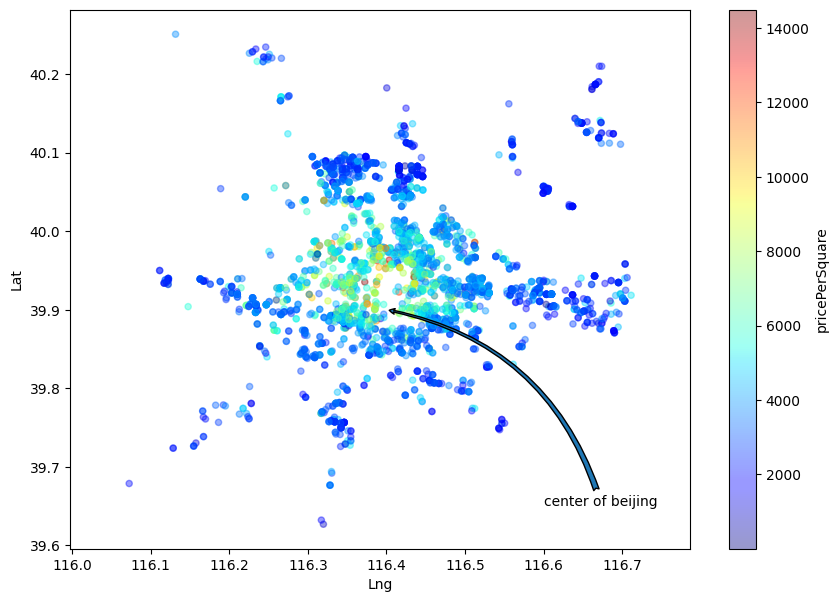

In [56]:
fig5 , ax5 = plt.subplots()
fig5.set_size_inches(10,7)

housing_sample.plot(x='Lng', y='Lat', ax=ax5, kind='scatter', alpha=0.4,
                    c='pricePerSquare', cmap=plt.get_cmap("jet"), colorbar=True)

ax5.axis('equal')

from matplotlib.patches import ConnectionStyle
connectionstyle = ConnectionStyle("Arc3", rad=0.3)
ax5.annotate("center of beijing",xy=(116.40,39.90),xytext=(116.6,39.65),arrowprops=dict(arrowstyle='fancy',connectionstyle=connectionstyle));


The chart above shows how the most expensive homes (per square meter) are located near the city center, and how prices fall as you move away from the city center.

Now we specify the size of the dots. We can choose the distance of each house from the city center as a measure of the size of the points. Notice the following figure:

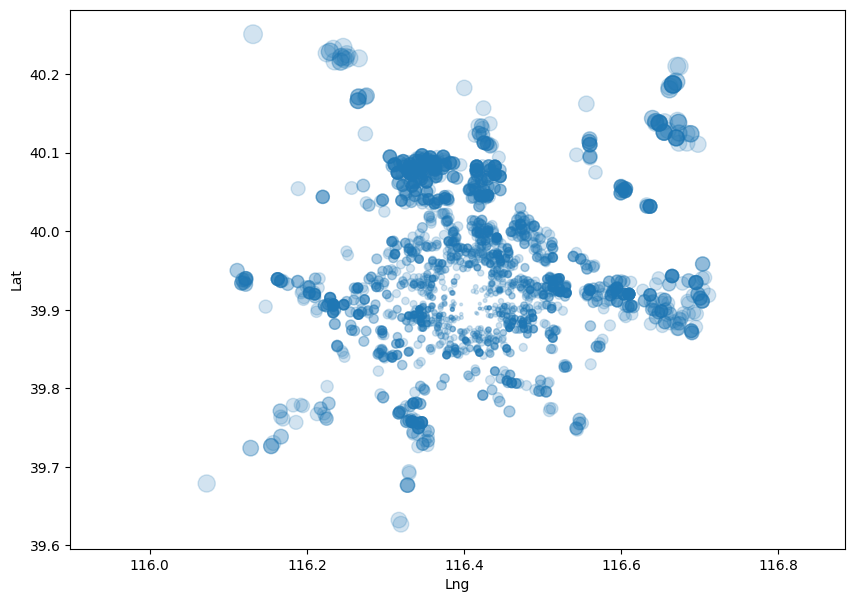

In [ ]:
fig6 , ax6 = plt.subplots()
fig6.set_size_inches(10,7)

housing_sample.plot(x = 'Lng' , y ='Lat' ,ax = ax6, kind = 'scatter', alpha = 0.2,\
    s = housing_sample['distanceToCapital'] * 4) #The coefficient of 4 is to quadruple the size of all the points.

ax6.axis('equal');

In the figure above, the color of all the places is the same, but their size is determined according to the distance of each house from the city center. The larger this number, the larger the dots will be displayed on the larger graph. The coefficient of 4 is to quadruple the size of all the points.

It is possible to place the photograph of this area of the world behind the drawn points to get a more realistic view of the location of the houses.

In [58]:
import matplotlib.image as mpimg

beijing_img = mpimg.imread('map1.jpg')
ax6.imshow(beijing_img, extent=[115.89777890444654, 116.90711309555346, 39.5957436, 40.2840444])
fig6

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\QueraCollege\\Quera_source_projects\\china\\map1.jpg'